CASE STUDY ON ENHANCING WEATHER PREDICTION

BSS/2021/95727 : JEREMIAH MAINA

In [1]:
!pip install xgboost
!pip install neuralprophet
!pip install plotly

In [2]:
!pip install plotly.express

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
import plotly.express as px 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from neuralprophet import NeuralProphet
from sklearn.preprocessing import LabelEncoder

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


DATA ANALYSIS

In [4]:
df=pd.read_csv("C:/Users/PC/Downloads/seattle-weather.csv")

In [5]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [6]:
df.shape

(1461, 6)

In [7]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [8]:
df.describe(include="object")

,date,weather
count,1461,1461
unique,1461,5
top,2012-01-01,rain
freq,1,641


In [9]:
for i in df.select_dtypes(include='object').columns:
    print("oooooooooooooooooooooooooooooooooo")
    print(df[i].value_counts())
    

oooooooooooooooooooooooooooooooooo
date
2012-01-01    1
2014-09-09    1
2014-09-07    1
2014-09-06    1
2014-09-05    1
             ..
2013-04-30    1
2013-04-29    1
2013-04-28    1
2013-04-27    1
2015-12-31    1
Name: count, Length: 1461, dtype: int64
oooooooooooooooooooooooooooooooooo
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


PRE-PROCESSING DATA

In [11]:
#Converting the date column from object to Dtype
df['date']=pd.to_datetime(df['date'])

In [12]:

# The column weather contains the data value in the string form and we need to predict the weather data so we convert it to an int as label.
df['weather']=LabelEncoder().fit_transform(df['weather'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1)
memory usage: 62.9 KB


DATA VISUALIZATIONS

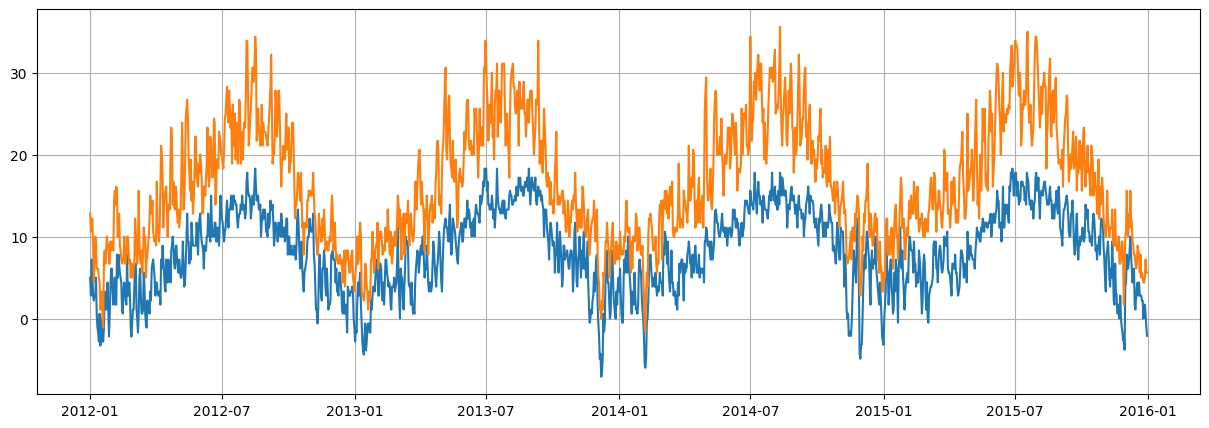

In [14]:
plt.figure(figsize = (15, 5))

fig=plt.plot(df["date"],df[['temp_min','temp_max']])
plt.grid(True)

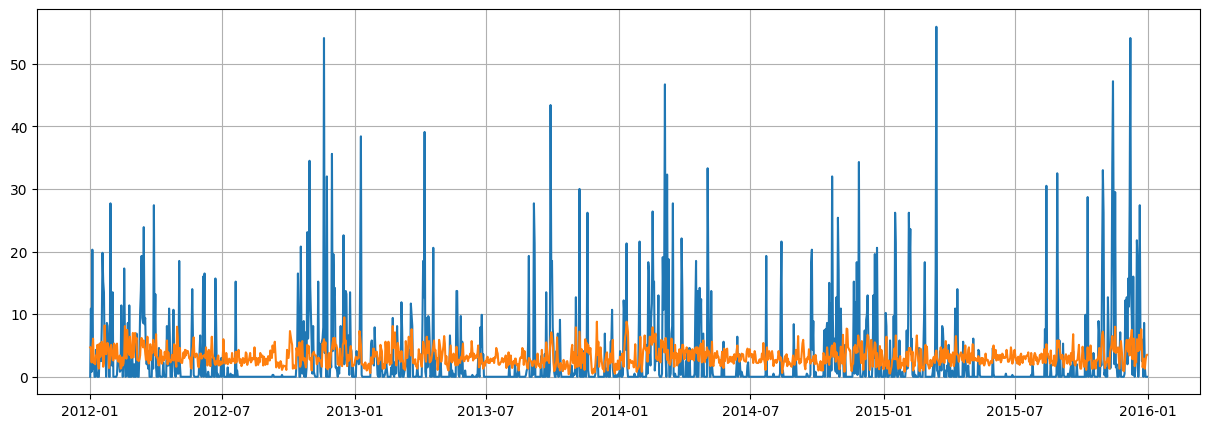

In [15]:
plt.figure(figsize = (15, 5))
fig2 = plt.plot(df['date'], df[['precipitation', 'wind']])
plt.grid();

precipitation       Axes(0.125,0.653529;0.352273x0.226471)
temp_max         Axes(0.547727,0.653529;0.352273x0.226471)
temp_min            Axes(0.125,0.381765;0.352273x0.226471)
wind             Axes(0.547727,0.381765;0.352273x0.226471)
weather                 Axes(0.125,0.11;0.352273x0.226471)
dtype: object

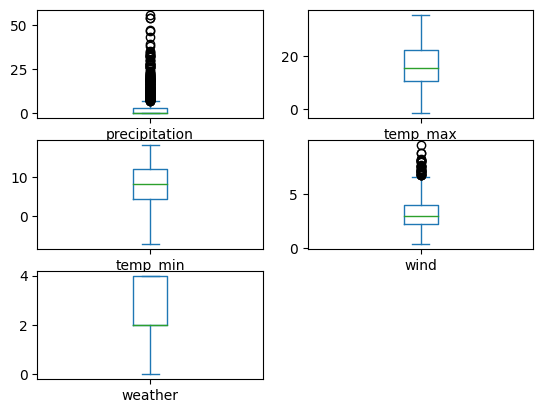

In [16]:
df.plot(kind='box',subplots=True, sharex=False, sharey = False, layout = (3,2))

In [17]:
df.corr()

,date,precipitation,temp_max,temp_min,wind,weather
date,1.000000,0.014292,0.145827,0.164249,-0.039163,0.067043
precipitation,0.014292,1.000000,-0.228555,-0.072684,0.328045,-0.267388
temp_max,0.145827,-0.228555,1.000000,0.875687,-0.164857,0.322337
temp_min,0.164249,-0.072684,0.875687,1.000000,-0.074185,0.154981
wind,-0.039163,0.328045,-0.164857,-0.074185,1.000000,-0.065858
weather,0.067043,-0.267388,0.322337,0.154981,-0.065858,1.000000


In [18]:
import seaborn as sns

<Axes: >

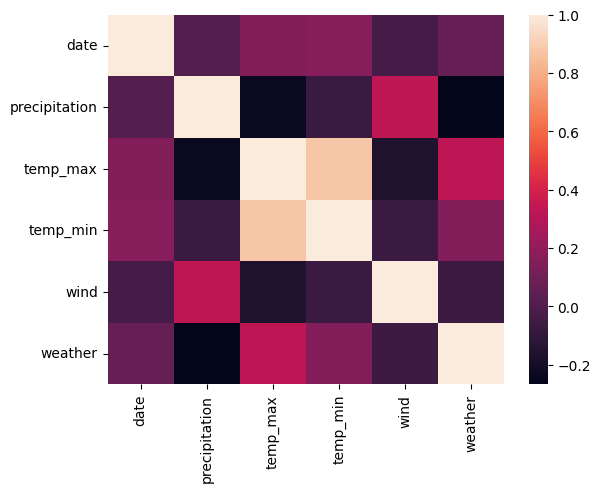

In [19]:
sns.heatmap(df.corr())

In [20]:
from pandas.plotting import scatter_matrix

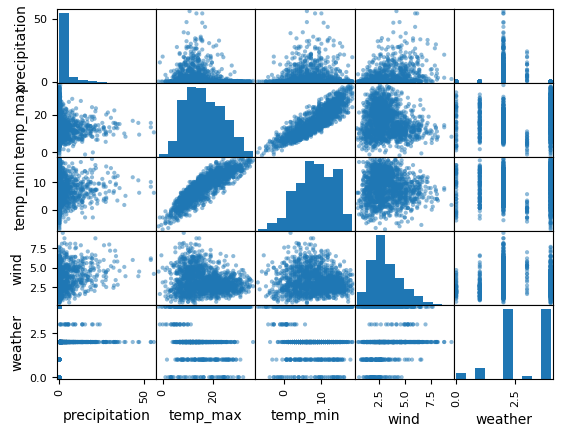

In [21]:
scatter_matrix(df)
plt.show()

MACHINE LEARNING MODEL

In [22]:
features=["precipitation", "temp_max", "temp_min", "wind"]
X=df[features]
y=df.weather
X_train, X_test, y_train,y_test = train_test_split(X, y,random_state = 0)

(1) K-NEAREST NEIGHBORS CLASSIFIER

In [23]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
print("KNN Accuracy:{:.2f}%".format(knn.score(X_test,y_test)*100))

KNN Accuracy:72.68%


(2) 
XGB Classifier

In [24]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
print("XGB Accuracy:{:.2f}%".format(xgb.score(X_test,y_test)*100))

XGB Accuracy:78.42%


(3) AdaBoost Classifier

In [25]:
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
print("AB Accuracy:{:.2f}%".format(ab.score(X_test,y_test)*100))

AB Accuracy:84.70%


## Improving Our Model AdaBoost Classifier

In [26]:
ab.get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'estimator', 'learning_rate', 'n_estimators', 'random_state'])

In [27]:
parameters = {
    'learning_rate': [1, 2, 3],
    'n_estimators': [100, 500, 1000]
}

cv = GridSearchCV(ab, param_grid=parameters, scoring='f1_micro', n_jobs=-1, verbose=3)
cv.fit(X_train, y_train)


Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [1, 2, 3],
                         'n_estimators': [100, 500, 1000]},
             scoring='f1_micro', verbose=3)

In [28]:
#predicting values from GridSearchCV
y_pred = cv.predict(X_test)

# show classification report on test data
print(classification_report(y_test.values, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       0.25      0.27      0.26        11
           1       0.17      0.23      0.19        31
           2       0.92      0.94      0.93       155
           3       1.00      0.17      0.29         6
           4       0.79      0.74      0.77       163

    accuracy                           0.76       366
   macro avg       0.63      0.47      0.49       366
weighted avg       0.78      0.76      0.76       366



## USER INPUT TEST

In [29]:
precipitation = float(input("Enter the precipitation: "))  # Convert to float for consistency
temp_max = float(input("Enter the maximum temp: "))
temp_min = float(input("Enter the minimum temp: "))
wind = float(input('Enter the speed of wind: '))

# Create a dictionary with input values
input_data = {
    'precipitation': [precipitation],
    'temp_max': [temp_max],
    'temp_min': [temp_min],
    'wind': [wind]
}

# Convert the dictionary to a DataFrame and then access the values
input_df = pd.DataFrame.from_dict(input_data)

# Predict using the model
ot = ab.predict(input_df)

# Print the predicted weather
print("The weather is:")
if ot[0] == 0:
    print("Drizzle")
elif ot[0] == 1:
    print("Fog")
elif ot[0] == 2:
    print("Rain")
elif ot[0] == 3:
    print("Snow")
else:
    print("Sun")

Enter the precipitation:  1.23
Enter the maximum temp:  2.33
Enter the minimum temp:  5.21
Enter the speed of wind:  5.6


The weather is:
Snow
